 Kernel: Linear 
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


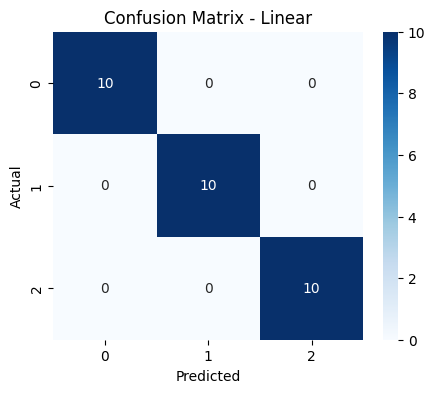

 Kernel: Polynomial (degree=3) 
Accuracy: 0.9666666666666667
Precision: 0.9696969696969696
Recall: 0.9666666666666667
F1-Score: 0.9665831244778613


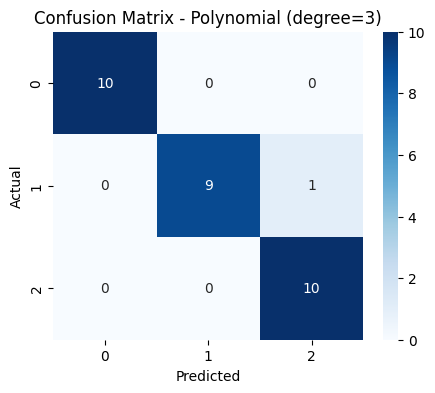

 Kernel: RBF 
Accuracy: 0.9666666666666667
Precision: 0.9696969696969696
Recall: 0.9666666666666667
F1-Score: 0.9665831244778613


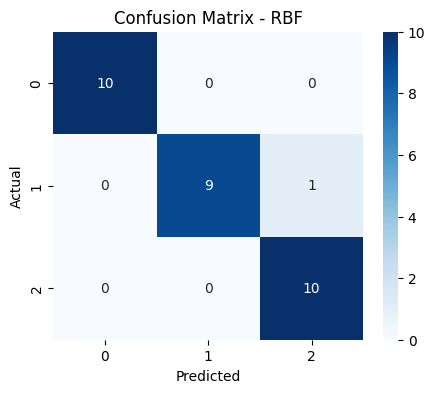



===== Performance Comparison =====
           Linear  Polynomial (degree=3)       RBF
Accuracy      1.0               0.966667  0.966667
Precision     1.0               0.969697  0.969697
Recall        1.0               0.966667  0.966667
F1-Score      1.0               0.966583  0.966583


In [3]:

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

kernels = {
    "Linear": SVC(kernel="linear"),
    "Polynomial (degree=3)": SVC(kernel="poly", degree=3),
    "RBF": SVC(kernel="rbf")
}

results = {}

for name, model in kernels.items():

    print(f" Kernel: {name} ")



    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)


    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results[name] = [acc, prec, rec, f1]

    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall:", rec)
    print("F1-Score:", f1)


    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

results_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1-Score"])
print("\n\n Performance Comparison ")
print(results_df)


Q2

In [2]:


from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


data = load_breast_cancer()
X = data.data
y = data.target


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


model_no_scale = SVC(kernel='rbf')
model_no_scale.fit(X_train, y_train)

train_acc_no_scale = model_no_scale.score(X_train, y_train)
test_acc_no_scale = model_no_scale.score(X_test, y_test)

print("Without Scaling")
print("Training Accuracy:", train_acc_no_scale)
print("Testing Accuracy :", test_acc_no_scale)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = SVC(kernel='rbf')
model_scaled.fit(X_train_scaled, y_train)

train_acc_scaled = model_scaled.score(X_train_scaled, y_train)
test_acc_scaled = model_scaled.score(X_test_scaled, y_test)

print("\nWith Scaling ")
print("Training Accuracy:", train_acc_scaled)
print("Testing Accuracy :", test_acc_scaled)


=== Without Scaling ===
Training Accuracy: 0.9186813186813186
Testing Accuracy : 0.9298245614035088

=== With Scaling ===
Training Accuracy: 0.9824175824175824
Testing Accuracy : 0.9824561403508771
